# Segway Motion (Inverted Pendulum)
In this notebook, I'll explore the motion of a segway traveling over terrain plots with a target speed.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
%matplotlib inline

This is where I will do the analytical work....

In [6]:
### CONSTANTS

# Length of the handle
r = 1

# Bob mass
bobMass = 3

In [8]:
# Define the equations of motion of the segway. 
# This is essentially the brain of the machine.
# 
# NOTE: All motion is driven by torque about the wheel.

def accel(x, y, theta):
    """Returns the acceleration of the base along the track."""
     
    return 1;
    

In [9]:
def calc_bob_pos(x, y, theta):
    """Returns the position of the bob calculated from the state of the main wheel."""
    return (x+r*np.sin(theta), y+r*np.cos(theta))

In [17]:

def aflat_terrain(x):
    """Returns the elevation y at distance x for the flat terrain."""
    return 1

def aflat_terrain_slope(x):
    """Returns the slope of the terrain at any given x."""
    return 0

def bump_terrain(x):
    """Returns the elevation y at distance x for the simple bump terrain."""
    # Bump is from x = 12 to x = 18.
    if (x >= 12 and x <= 18):
        xp = x - 12
        return -(1/8) * xp * (xp-6) + 1
    else: 
        return 1
    
def flat_terrain(dist):
    """Returns the x and y coordinates a distance d along a flat path."""
    return (dist, 0)

def flat_terrain_slope(dist):
    """Returns the slope of the path a distance d along the path."""
    return (0, 0)

In [18]:
#TODO This isn't quite right i think that I need to parameterize the
# path
def euler(x, xDot, yDot, timeStep, theta, dtheta, terrain, terrain_slope):
    """Euler Integration routine"""
    
    # This needs to be calculated
    Ad = 1                 # Acceleration along path 
    newVd = Ad * timeStep  # Velocity along path
    newD = Vd * timeStep   # Distance along path
    
    # x and y motion is calculated from path
    ddx = 1 # horizontal acceleration
    ddy = 1 # vertical acceleration (depends on dterrain)
    
    dx = terrain_slope(d)[0]
    dy = terrain_slope(d)[1]
    
    x = terrain(d)
    y = terrain(d)
    
    ddTheta = (1/r) * ( -dx*dtheta*np.sin(theta) - dy*dtheta*np.cos(theta) + y*np.sin(theta) - (ddx*np.cos(theta) - dx*dtheta*np.sin(theta)) + (ddy*np.sin(theta) - dx*dtheta*np.sin(theta)) )
    dTheta += ddTheta*timeStep
    theta += dTheta
    
    return (Vd, d, x, dx, y, dy, dTheta, theta)
    

## Flat Terrain

In [22]:
# Find distance d along path such that x = 30 
timestep = 0.01
xdist = 30
d = 0
while(flat_terrain(d)[0] < xdist):
    d += 0.1

print(d)

30.000000000000156


In [30]:
# build the terrain graph with 
path = np.linspace(0, 30, 300)
terrain = [flat_terrain(d) for d in path]
terrainX = [x for (x,y) in terrain]
terrainY = [y for (x,y) in terrain]

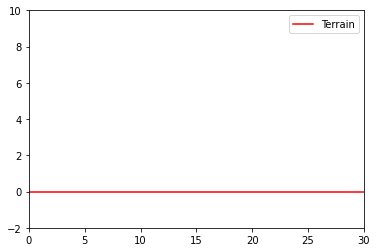

In [32]:
plt.figure()

plt.plot(terrainX, terrainY, 'r', label='Terrain')
plt.ylim([-2,10])
plt.xlim([0,30])

plt.legend()

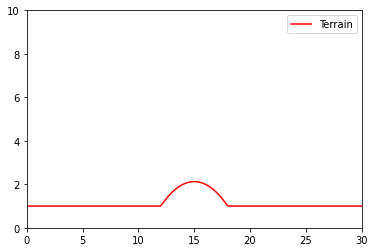

In [20]:
# Plot the solution
plt.figure()

plt.plot(xList, yList, 'r', label='Terrain')
plt.ylim([0,10])
plt.xlim([0,30])

plt.legend()